### Podatkovno rudarjenje, koda za vmesno poročilo o opravljenem delu, 12. 4. 2018

# Priprava podatkov in osnovna vizualizacija

**Nejc Prijatelj**

**Žan Pristopec**

**Miha Štravs**

V tem notebook-u bomo pisali kodo za obdelavo podatkov, iz katerih bomo s pomočjo pythona, statistike in vizualizacije poiskusili odgovoriti na čim več vprašanj, ki smo si jih zastavili pri izbiri projekta.

## Podatki

Kratek opis podatkov je bil podan že pri osnutku projekta, tu pa bi si najprej na hitro pogledali kaj točno dani podatki vsebujejo. Link do podatkov(https://www.kaggle.com/datasnaek/youtube-new/data).

Vse podatke ki smo jih dobili s spletne strani Kaggle hranimo v diretktoriju "data" in so sledeči:

* *CAvideos.csv:* podatki o trendih videih za Kanado,
* *DEvideos.csv:* podatki o trendih videih za Nemčijo,
* *FRvideos.csv:* podatki o trendih videih za Francijo,
* *GBvideos.csv:* podatki o trendih videih za Veliko Britanijo,
* *USvideos.csv:* podatki o trendih videih za Združene Države,

Vsak podatek v tej zbirki ima naslednje atribute:
* *video_id:* je kar link do videa, in je za vsak vnesen podatek unikaten.
* *trending_date:* datum, katerega je bil video trending.
* *title:* naslov videa.
* *channel_title:* ime youtube kanala ki je video naložil na youtube.
* *category_id:* id kategorije v katero spada video.
* *publish_time:* kdaj je bil video naložen.
* *tags:* ključne besede ki opisujejo video.
* *views:* število ogledov.
* *likes:* število pozitivnih odzivov.
* *dislikes:* število negativnih odzivov.
* *comment_count:* število komentarjev.
* *thumbnail_link:* link do thumbnaila.
* *comments_disabled:* onemogočeni komentarji(true/false).
* *ratings_disabled:* onemogočen odziv na video(true/false).
* *video_error_or_removed:* če je bil video odstranjen(true/false).
* *description:* opis.

Poleg petih že naštetih csv datotek pa podatkovna zbirka vsebuje še pet json datotek, v katerih je podrobneje opisan atribut *category_id* za vsako regijo. Na kratko povedano nam pove kaj pomeni naprimer category_id = 10 &rarr; "music".


### Pridobivanje podatkov

Najprej smo vse podatke prebrali v panda data frame s spodaj napisano funkcijo, in v vsaki tabeli spremenili datume tako, da so bolj po našem okusu.

In [149]:
import numpy as np
import pandas as pan
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import matplotlib
import math
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path


matplotlib.__version__

def trans_time(date):
    return datetime.strptime(date, '%y.%d.%m').strftime('%d.%m.%y')

def read_table(file_name):
    data = pan.read_csv(file_name, sep=',')
    return data

def videos_per_cat(file_name, data_frame):
    
    frame_data = data_frame
    videos_count = frame_data.groupby("category_id").count()
    videos_count = videos_count.reset_index()
    videos_count = videos_count[["category_id", "video_id"]]
    json_data = json.load(open(file_name))
    cats = dict()
    for cat in json_data["items"]:
        cats[cat["id"]] = cat["snippet"]["title"]


    cats = pan.DataFrame(list(cats.items()), columns=['category_id', 'category_title']);
    cats["category_id"] = cats["category_id"].astype("int64");
    videos_count = pan.merge(videos_count, cats, on="category_id");

    index = np.arange(len(videos_count));
    plt.barh(index, videos_count["video_id"]);
    plt.yticks(index, videos_count["category_title"], fontsize=10);
    plt.show()

'2.1.2'

In [81]:
CA_data = read_table("data/CAvideos.csv")
DE_data = read_table("data/DEvideos.csv")
FR_data = read_table("data/FRvideos.csv")
GB_data = read_table("data/GBvideos.csv")
US_data = read_table("data/USvideos.csv")

CA_data["trending_date"] = CA_data["trending_date"].apply(trans_time)
DE_data["trending_date"] = DE_data["trending_date"].apply(trans_time)
GB_data["trending_date"] = GB_data["trending_date"].apply(trans_time)
US_data["trending_date"] = US_data["trending_date"].apply(trans_time)
FR_data["trending_date"] = FR_data["trending_date"].apply(trans_time)

### Nekaj vizualnih predstavitev

Ker je tako velika količina podatkov prevelika da bi iz nje lahko kar tako ugotovili določene zanimive lastnosti, smo se odločili da bomo najprej naredili nekaj grafov da dobimo občutek s čem imamo opravka, in da predstavimo nekatere bolj zanimive podatke.

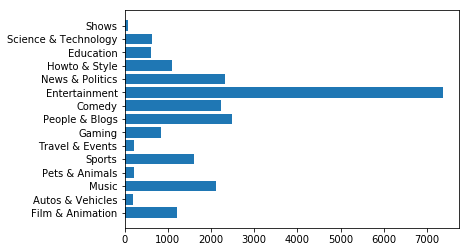

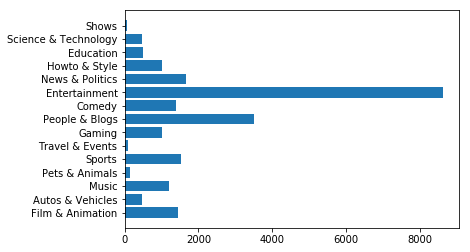

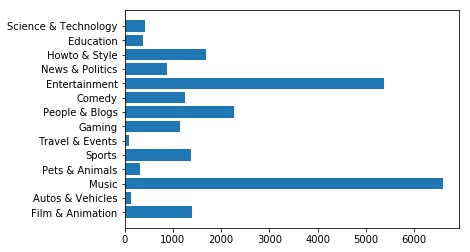

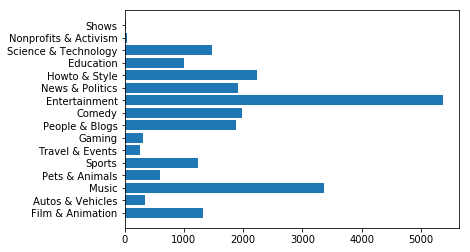

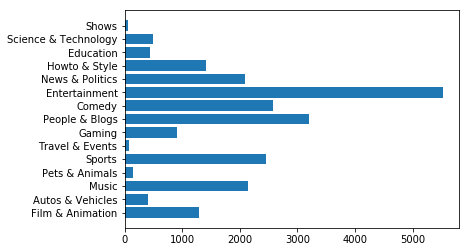

In [150]:
videos_per_cat("data/CA_category_id.json", CA_data)
videos_per_cat("data/DE_category_id.json", DE_data)
videos_per_cat("data/GB_category_id.json", GB_data)
videos_per_cat("data/US_category_id.json", US_data)
videos_per_cat("data/FR_category_id.json", FR_data)



Zgornji grafi prikazujejo stevilo trending videov za vsa območja.

Text(0,0.5,'stevilo kanalov')

Text(0.5,1,'FR')

Text(0.5,1,'US')

Text(0.5,0,'stevilo videov')

Text(0.5,1,'GB')

Text(0.5,1,'DE')

Text(0.5,1,'CA')

<BarContainer object of 48 artists>

<BarContainer object of 41 artists>

<BarContainer object of 38 artists>

<BarContainer object of 51 artists>

<BarContainer object of 46 artists>

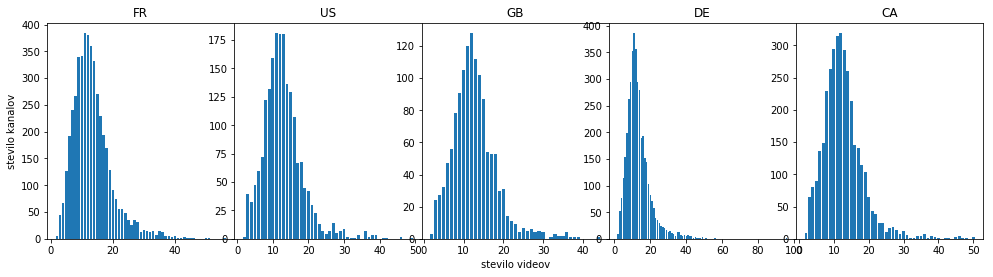

In [62]:
def video_channel(data):
    channels = dict()
    for i, video in data.iterrows():
        if video['channel_title'] in channels:
            channels[video['channel_title']].append(video)
        else:
            channels[video['channel_title']] = [video]
    g = dict()
    for channel in channels:
        video_count = len(channel)
        if video_count in g:
            g[video_count] = g[video_count] + 1
        else:
            g[video_count] = 1
    return g
gFR = video_channel(FR_data)
gUS = video_channel(US_data)
gGB = video_channel(GB_data)
gDE = video_channel(DE_data)
gCA = video_channel(CA_data)

fig = plt.figure(figsize=(13, 3))
axes1 = fig.add_axes([0.0, 0.0, 0.2, 1])
axes1.set_ylabel('stevilo kanalov')
axes1.set_title('FR')
axes2 = fig.add_axes([0.2, 0.0, 0.2, 1])
axes2.set_title('US')
axes3 = fig.add_axes([0.4, 0.0, 0.2, 1])
axes3.set_xlabel('stevilo videov')
axes3.set_title('GB')
axes4 = fig.add_axes([0.6, 0.0, 0.2, 1])
axes4.set_title('DE')
axes5 = fig.add_axes([0.8, 0.0, 0.2, 1])
axes5.set_title('CA')
axes1.bar(gFR.keys(), gFR.values())
axes2.bar(gUS.keys(), gUS.values())
axes3.bar(gGB.keys(), gGB.values())
axes4.bar(gDE.keys(), gDE.values())
axes5.bar(gCA.keys(), gCA.values())

Grafi prikazujejo, koliko kanalov ima neko stevilo trending videov.